<a href="https://colab.research.google.com/github/kulivixix/Edu/blob/main/2_%D0%9E%D0%9E%D0%9F_%D0%91%D0%B8%D0%B1%D0%BB%D0%B8%D0%BE%D1%82%D0%B5%D0%BA%D0%B8_%D0%B4%D0%BB%D1%8F_DS_solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Занятие 2. ООП. Библиотеки для DS


In [1]:
# загрузим библиотеки
import numpy as np
import pandas as pd

## Задание 1

Создайте массив массив из 100 элементов (от 1 до 100), переформатируйте в формат (10 * 10), сделайте слайсинг с шагом 2 по каждой оси.

In [59]:
# Create array
array_ = np.arange(1,101)

# Reshape array to form 10 * 10 and re-write initial array
array_ = array_.reshape(10,10)

# Slice every 2nd rows and every 2nd element in it
array_[::2, ::2]


array([[ 1,  3,  5,  7,  9],
       [21, 23, 25, 27, 29],
       [41, 43, 45, 47, 49],
       [61, 63, 65, 67, 69],
       [81, 83, 85, 87, 89]])

## Задание 2

Написать функцию, которая по заданной длине последовательности находит среднее арифметическое ее членов.

Реализуйте задачу с и без помощи numpy, сравните время выполнения

In [64]:
# решение с использованием numpy
# для оценки времени исоплнения блока
%%time
# зададим длину нашей последовательности
dlina_posl = 100_000_000

# ваш код тут
avg_numpy = np.arange(1,dlina_posl).sum() / dlina_posl
print(f'Среднее арифметическое последовательности = {avg_numpy}')

Среднее арифметическое последовательности = 49999999.5
CPU times: user 239 ms, sys: 0 ns, total: 239 ms
Wall time: 248 ms


In [65]:
# решение без использования numpy
# для оценки времени исоплнения блока
%%time

# ваш код тут
avg_classic = sum(list(range(1,dlina_posl))) / dlina_posl
print(f'Среднее арифметическое последовательности = {avg_classic}')

Среднее арифметическое последовательности = 49999999.5
CPU times: user 2.83 s, sys: 2.23 s, total: 5.06 s
Wall time: 5.05 s


## Задание 3 *(необязательно)

Задан Series объект s, найти индекс первого элемента отсортированного s, где значения больше 5

In [67]:
# задано изначально
r = np.random.RandomState(1)
s = pd.Series(r.uniform(0, 10, 100))
s = s.sort_values()

print(s[s>5].index[0])


67


## Задание 4

Предположим, что мы наблюдаем за некоторым признаком нашего датасета, но в данных есть пропуски. Ваша задача: реализовать алгоритм заполнения пропущенных значений последним известным с помощью средств python и pandas. (подсказка: вам может помочь функция np.isnan(), которая возвращает True, если число - nan. Для реализации с пандас стоит посмотреть на метод .fillna).

Изначальный код с инициализацией такого датасета предоставлен.

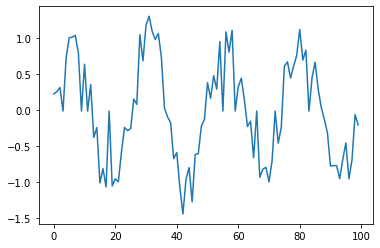

In [68]:
# импортируем библиотеку для создания шума
import random
# библиотека для визуализации
import matplotlib.pyplot as plt

# создадим наши данные и добавим к каждой точке синусоиды случайный шум
a = np.linspace(0, 25, 100)
a = np.sin(a) + [random.gauss(0, 0.2) for i in range(len(a))]

# создадим 10 случайных пропусков
for i in range(10):
    a[random.randint(0, len(a) - 1)] = None
# создадим датафрейм
df = pd.DataFrame({'target':a})

# ваш код тут
df = df.fillna(df.mean(axis=0))

# отобразим
plt.plot(df.target.values)

## Задание 5 *(необязательно)

Имеется небольшой игрушечный датафрейм, в котором необходимо провести несколько типов фильтраций (ответы ищите в решениях) и отобразить результат:

* всех, кто старше 40
* всех, кто имеет доход выше среднего по датасету
* всех, кто имеет доход выше среднего по датасету, но надежность ниже среднего по датасету

создать новые столбцы:

* важность клиента = доход * надежность
* возможная долгосрочность клиента = важность клиента * (средний возраст по датасету - возраст клиента)

`подсказка: двойные условия записываются так: (условие 1) & (условие 2)`


** примечание: столбцы не имеют отношения к реальным формулам или моделям, они необходимы только для наглядности

In [74]:
# создадим тестовый датасет
df = pd.DataFrame({
    'имя': ['Петя', 'Вася', 'Аня', 'Света'],
    'возраст': [45, 26, 41 , 21],
    'доход': [100000, 80000, 150000, 60000],
    'надежность клиента (0..1)': [0.65, 0.74, 0.87, 0.68],
    'пол': ['муж', 'муж', 'жен', 'жен']},
    index=[0, 1, 2, 3])

df



,имя,возраст,доход,надежность клиента (0..1),пол
0,Петя,45,100000,0.65,муж
1,Вася,26,80000,0.74,муж
2,Аня,41,150000,0.87,жен
3,Света,21,60000,0.68,жен


In [75]:
#всех, кто старше 40
df[df['возраст']>40]

,имя,возраст,доход,надежность клиента (0..1),пол
0,Петя,45,100000,0.65,муж
2,Аня,41,150000,0.87,жен


In [76]:
#всех, кто имеет доход выше среднего по датасету
df[df['доход'] > df['доход'].mean()]

,имя,возраст,доход,надежность клиента (0..1),пол
0,Петя,45,100000,0.65,муж
2,Аня,41,150000,0.87,жен


In [85]:
#всех, кто имеет доход выше среднего по датасету, 
#но надежность ниже среднего по датасету

df[(df['доход'] > df['доход'].mean()) & \
   (df['надежность клиента (0..1)'] < df['надежность клиента (0..1)'].mean())]

,имя,возраст,доход,надежность клиента (0..1),пол
0,Петя,45,100000,0.65,муж


In [87]:
# Создать новые столбцы: 1) важность клиента = доход * надежность
df['важность'] = df['доход'] * df['надежность клиента (0..1)']
df

,имя,возраст,доход,надежность клиента (0..1),пол,важность
0,Петя,45,100000,0.65,муж,65000.0
1,Вася,26,80000,0.74,муж,59200.0
2,Аня,41,150000,0.87,жен,130500.0
3,Света,21,60000,0.68,жен,40800.0


In [90]:
# 2) возможная долгосрочность клиента = важность клиента * (средний возраст по датасету - возраст клиента)
df['долгосрочность'] = df['важность'] * (df['возраст'].mean() - df['возраст'])
df

,имя,возраст,доход,надежность клиента (0..1),пол,важность,долгосрочность
0,Петя,45,100000,0.65,муж,65000.0,-763750.0
1,Вася,26,80000,0.74,муж,59200.0,429200.0
2,Аня,41,150000,0.87,жен,130500.0,-1011375.0
3,Света,21,60000,0.68,жен,40800.0,499800.0
